# 5 Graph Algorithms 

## Connected Components

In [2]:
import networkx as nx

In [3]:
edgelist = [['Mannheim', 'Frankfurt', 85], ['Mannheim', 'Karlsruhe', 80], ['Erfurt', 'Wurzburg', 186], ['Munchen', 'Numberg', 167], ['Munchen', 'Augsburg', 84], ['Munchen', 'Kassel', 502], ['Numberg', 'Stuttgart', 183], ['Numberg', 'Wurzburg', 103], ['Numberg', 'Munchen', 167], ['Stuttgart', 'Numberg', 183], ['Augsburg', 'Munchen', 84], ['Augsburg', 'Karlsruhe', 250], ['Kassel', 'Munchen', 502], ['Kassel', 'Frankfurt', 173], ['Frankfurt', 'Mannheim', 85], ['Frankfurt', 'Wurzburg', 217], ['Frankfurt', 'Kassel', 173], ['Wurzburg', 'Numberg', 103], ['Wurzburg', 'Erfurt', 186], ['Wurzburg', 'Frankfurt', 217], ['Karlsruhe', 'Mannheim', 80], ['Karlsruhe', 'Augsburg', 250],["Mumbai", "Delhi",400],["Delhi", "Kolkata",500],["Kolkata", "Bangalore",600],["TX", "NY",1200],["ALB", "NY",800]]

In [4]:
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])
    
"""Graph.add_edge(u_of_edge, v_of_edge, **attr) Add an edge between u and v."""

In [7]:
for i, x in enumerate(nx.connected_components(g)):
    print("cc"+str(i)+":",x)

cc0: {'Mannheim', 'Stuttgart', 'Erfurt', 'Numberg', 'Karlsruhe', 'Kassel', 'Augsburg', 'Munchen', 'Frankfurt', 'Wurzburg'}
cc1: {'Kolkata', 'Delhi', 'Mumbai', 'Bangalore'}
cc2: {'NY', 'ALB', 'TX'}


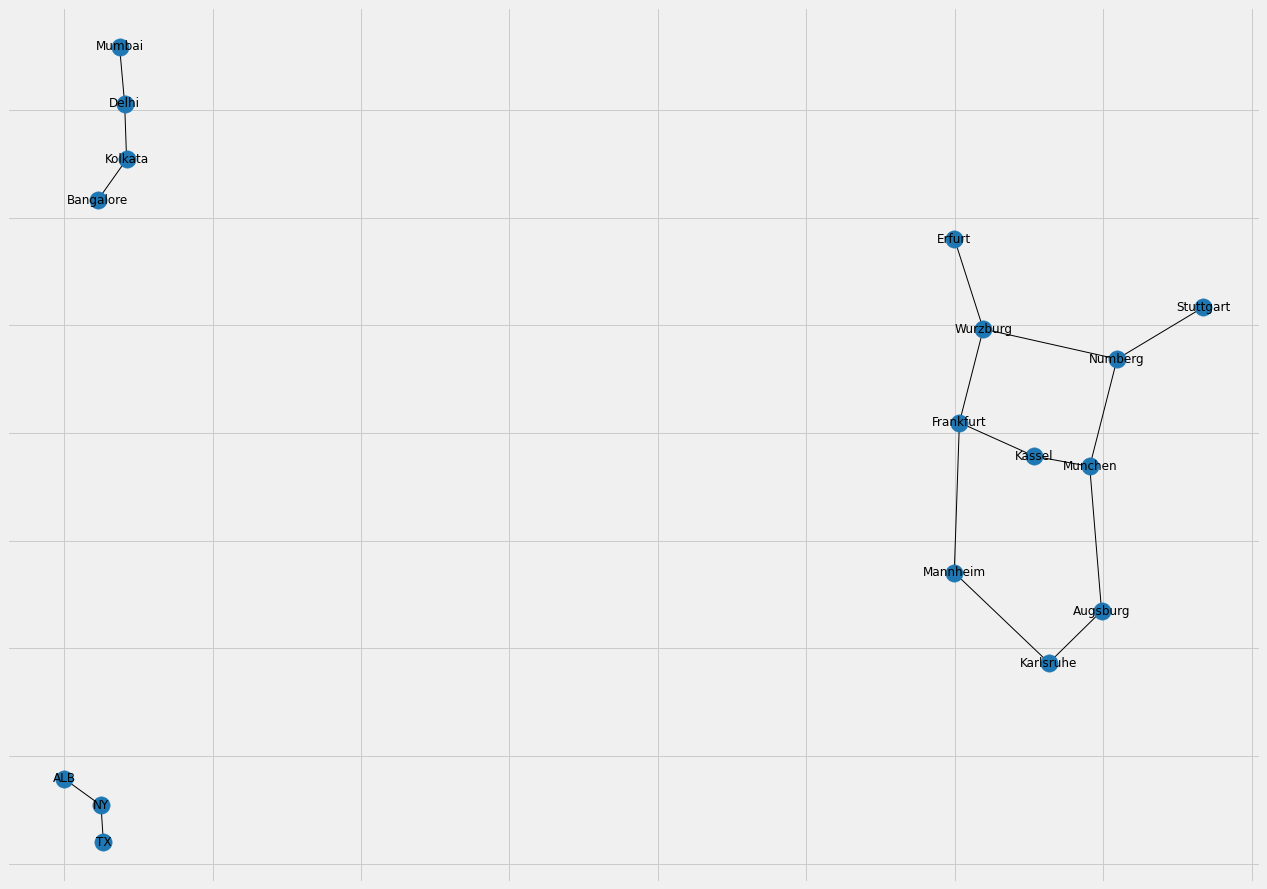

In [28]:
nx.draw_networkx(g)

## Shortest Path

In [8]:
#Continuing with the above example only, we are given a graph with the cities of Germany and the respective distance 
#between them. I want to find out how to go from Frankfurt (The starting node) to Munchen by covering the shortest distance.

'Continuing with the above example only, we are given a graph with the cities of Germany and the respective distance between them.\nYou want to find out how to go from Frankfurt (The starting node) to Munchen by covering the shortest distance.'

In [9]:
#The algorithm thqt i will use is called Dijkstra
#What is the shortest way to travel from given city to given city
#This Algorithm is use in Google maps to find the shortest routes
#LinkedIn shows up 1st-degree connections, 2nd-degree connections, due to this algorithm

In [10]:
print(nx.shortest_path(g, 'Stuttgart','Frankfurt',weight='weight'))
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'))

['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503


In [11]:
#I can also find Shortest paths between all pairs using:
for x in nx.all_pairs_dijkstra_path(g,weight='weight'):
    print(x)

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

## Minimum Spanning Tree - MST

In [12]:
#Problem: I work for an internet fiber company. I need to connect all the cities in the graph we 
#have using the minimum amount of wire. How do we do this?

In [13]:
#Minimum spanning trees have direct applications in the design of networks
#MST is used for approximating the traveling salesman problem and other applications as :
#Clustering — 1st: construct MST and then determine a threshold value for breaking some edges in the MST 
#using Intercluster distances and Intracluster distances.
#Image Segmentation — where we 1st construct an MST on a graph where pixels are nodes and distances between 
#pixels are based on some similarity measure(color, intensity, etc.)

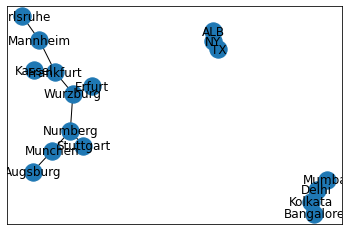

In [14]:
# nx.minimum_spanning_tree(g) returns a instance of type graph
nx.draw_networkx(nx.minimum_spanning_tree(g))

# Pagerank

In [15]:
#This is the page sorting algorithm that powered google for a long time. It assigns scores to pages based on the number 
# and quality of incoming and outgoing links.
# Pagerank can be used anywhere where we want to estimate node importance in any network.
# It has been used for finding the most influential papers using citations.
# Has been used by Google to rank pages
#It can be used to rank tweets- User and Tweets as nodes. Create Link between user if user A follows user B and Link between user and Tweets if user tweets/retweets a tweet.
# Recommendation engines

In [16]:
# For this exercise, we are going to be using Facebook data. 
# We have a file of edges/links between facebook users. We first create the FB graph using:

In [18]:
# reading the dataset
fb = nx.read_edgelist('facebook_combined.txt', create_using = nx.Graph(), nodetype = int)

In [23]:
from matplotlib import pyplot as plt

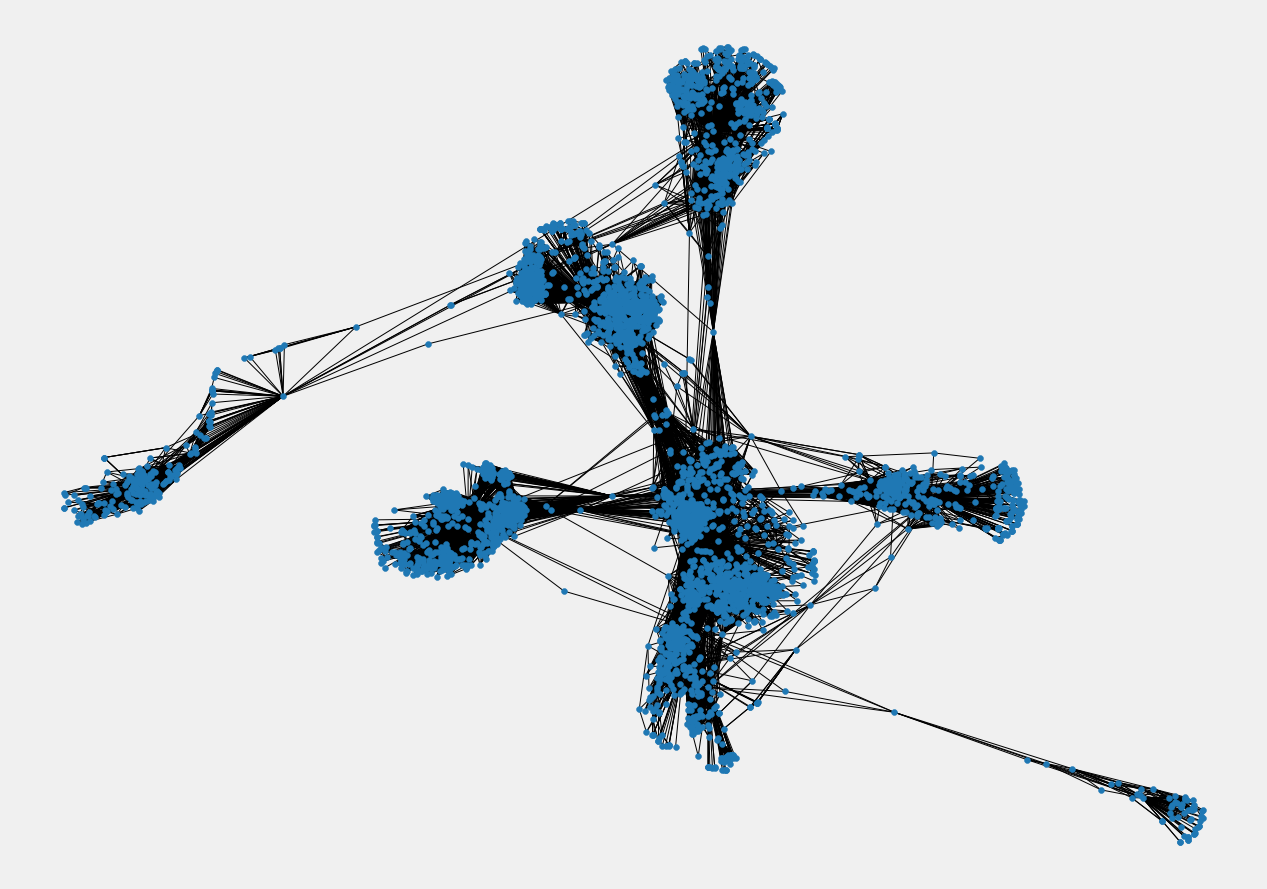

In [24]:
pos = nx.spring_layout(fb)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [25]:
# Now we want to find the users having high influence capability.
# Intuitively, the Pagerank algorithm will give a higher score to a user who has a lot of friends who in turn have a lot of FB Friends.
pageranks = nx.pagerank(fb)
print(pageranks)

{0: 0.006289602618466542, 1: 0.00023590202311540972, 2: 0.00020310565091694562, 3: 0.00022552359869430617, 4: 0.00023849264701222462, 5: 0.00020234812068977806, 6: 0.0001800186713563964, 7: 0.00026267667111515796, 8: 0.00023737300152657913, 9: 0.0006001572433028073, 10: 0.00013504865958890368, 11: 5.2591423276218314e-05, 12: 5.2591423276218314e-05, 13: 0.0003306419576230765, 14: 0.0002886439803414604, 15: 5.2591423276218314e-05, 16: 0.0001332430576919805, 17: 0.00026000987429524483, 18: 5.2591423276218314e-05, 19: 0.0003806431405636216, 20: 0.00029297537600066995, 21: 0.0006928319433106632, 22: 0.00016385672869526863, 23: 0.00040432634048828404, 24: 0.00022824011209266322, 25: 0.000800412660519768, 26: 0.0006922746319436039, 27: 9.900477693053426e-05, 28: 0.0002552192093758929, 29: 0.00019154955480122377, 30: 0.00021219645131216383, 31: 0.0002993619581806596, 32: 0.0001478893714943048, 33: 9.172093610965164e-05, 34: 9.248443396698941e-05, 35: 7.353643512923525e-05, 36: 0.00018502677914

In [26]:
#We can get the sorted PageRank or most influential users using:
import operator
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True)
print(sorted_pagerank)

[(3437, 0.007614586844749603), (107, 0.006936420955866114), (1684, 0.0063671621383068295), (0, 0.006289602618466542), (1912, 0.0038769716008844974), (348, 0.0023480969727805783), (686, 0.0022193592598000193), (3980, 0.002170323579009993), (414, 0.0018002990470702262), (698, 0.0013171153138368807), (483, 0.0012974283300616082), (3830, 0.0011844348977671688), (376, 0.0009014073664792464), (2047, 0.000841029154597401), (56, 0.0008039024292749443), (25, 0.000800412660519768), (828, 0.0007886905420662135), (322, 0.0007867992190291396), (475, 0.0007853586142469624), (428, 0.0007800171933479684), (67, 0.0007724556453836683), (3596, 0.0007657185486816217), (2313, 0.0007541077515661327), (713, 0.0007493481050218991), (271, 0.0007457889296014823), (563, 0.0007402839803830178), (917, 0.0007331559412352088), (119, 0.000731907259320906), (3545, 0.0007271573982528102), (3938, 0.0007266014687561135), (277, 0.0007191102550992672), (1888, 0.0007117172673725058), (1800, 0.0006984646532952207), (3604, 0.

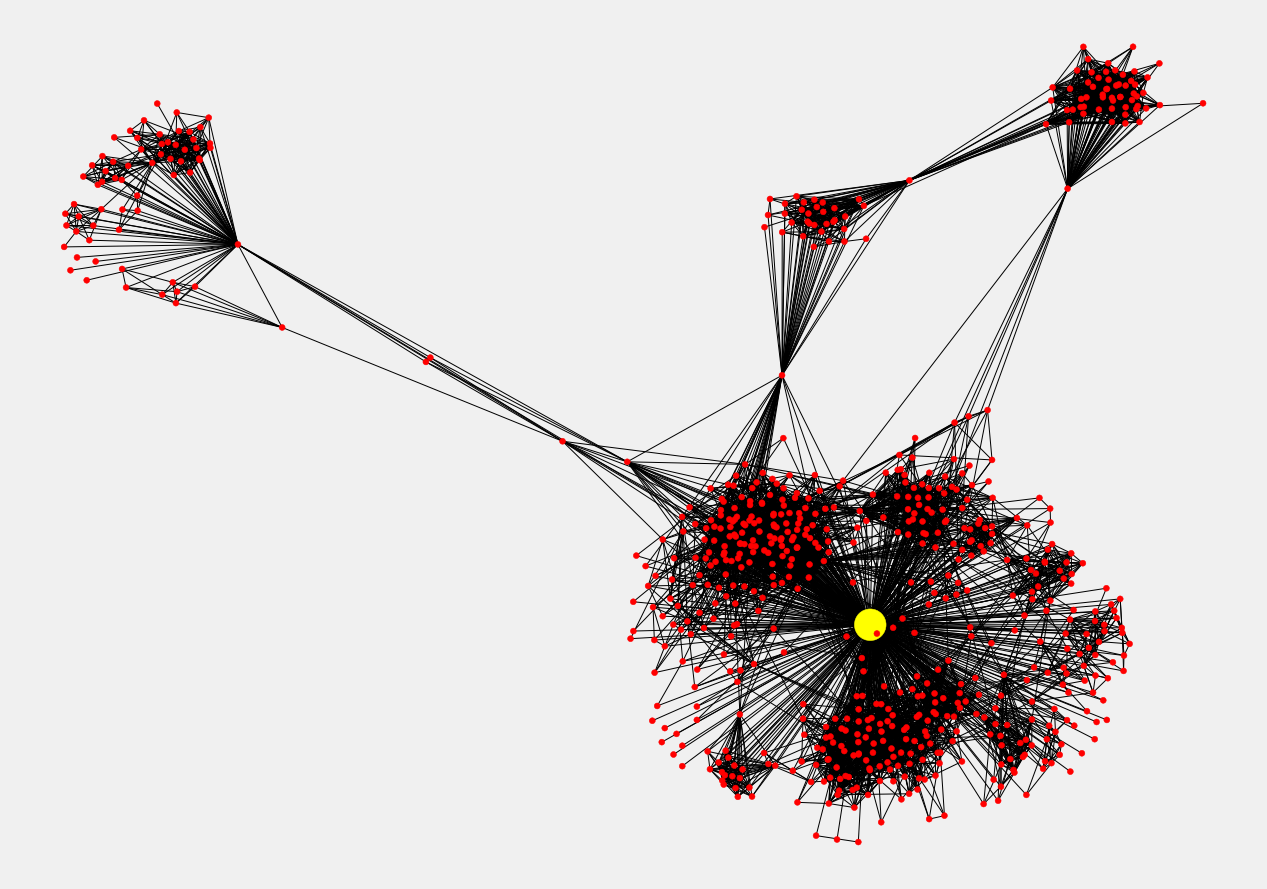

In [27]:
# The above IDs are for the most influential users.
# We can see the subgraph for the most influential user:

first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))
subgraph_3437 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes)
pos = nx.spring_layout(subgraph_3437)
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]
node_size =  [1000 if v == 3437 else 35 for v in subgraph_3437]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

## Centrality Measures 

In [29]:
# There are a lot of centrality measures which you can use as features to your machine learning models.
# I will talk about two of them
# Betweenness Centrality: It is not only the users who have the most friends that are important, 
# the users who connect one geography to another are also important as that lets users see content from diverse geographies. 
# Betweenness centrality quantifies how many times a particular node comes in the shortest chosen path between two other nodes.
# Degree Centrality: It is simply the number of connections for a node.
# Centrality measures can be used as a feature in any machine learning model.

### Betweenness centrality

(-1.0913400053977966,
 0.9181401133537292,
 -0.8680707484483718,
 0.579162922501564)

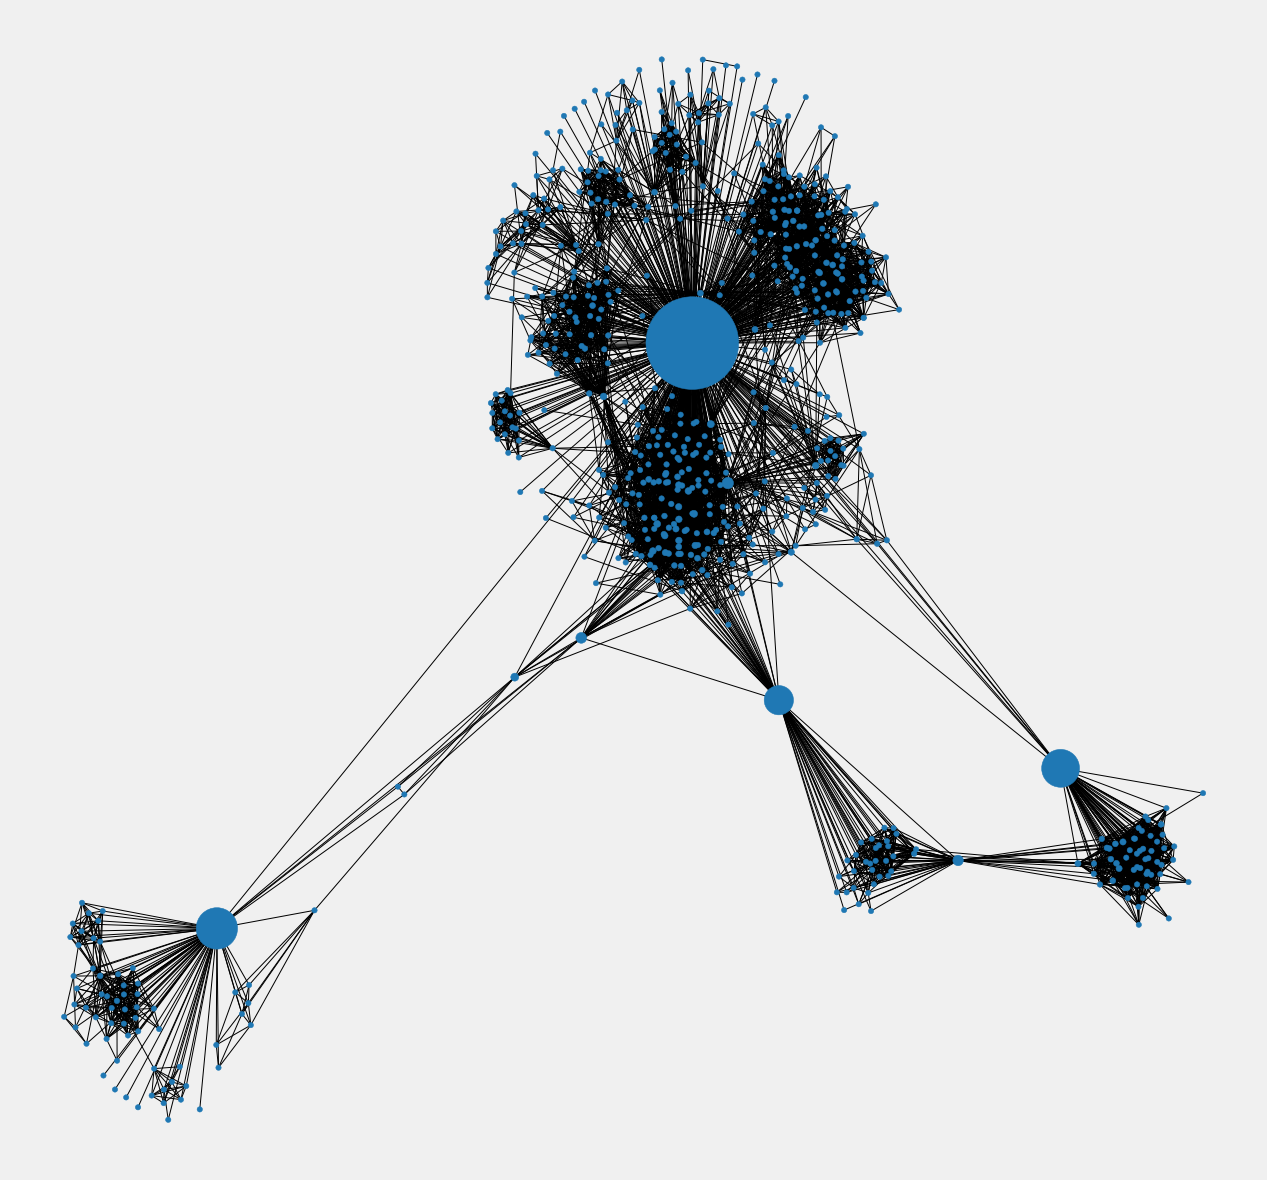

In [30]:
# Here is the code for finding the Betweenness centrality for the subgraph.
pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

In [ ]:
# You can see the nodes sized by their betweenness centrality values here. 
# They can be thought of as information passers. Breaking any of the nodes with a high betweenness Centrality 
# will break the graph into many parts.